<a href="https://colab.research.google.com/github/Ayan022000/Diabetes-prediction-project/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.shape

(100000, 9)

In [ ]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender']= le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [ ]:
indep =df.drop('diabetes',axis=1)

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
ov = SMOTE()
X,y = ov.fit_resample(indep,df['diabetes'])

In [ ]:
df1 = pd.DataFrame(X,columns=indep.columns)
df2= pd.DataFrame(y,columns=['diabetes'])

In [ ]:
final_df = pd.concat([df1,df2],axis=1)
final_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
final_df['diabetes'].value_counts()

0    91500
1    91500
Name: diabetes, dtype: int64

In [ ]:
x = final_df.drop('diabetes',axis=1)
y = final_df['diabetes']

In [ ]:
x.shape, y.shape

((183000, 8), (183000,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=5)

In [ ]:
model=model.fit(x_train_scaled,y_train)

In [ ]:
y_pred = model.predict(x_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.8875409836065574

In [ ]:
confusion_matrix(y_test,y_pred)

array([[24240,  3129],
       [ 3145, 24386]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     27369
           1       0.89      0.89      0.89     27531

    accuracy                           0.89     54900
   macro avg       0.89      0.89      0.89     54900
weighted avg       0.89      0.89      0.89     54900



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 300],
    'warm_start': [True, False]
}


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [ ]:
clf = GridSearchCV(classifier,parameters,cv=5)

In [ ]:
clf.fit(x_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'warm_start': [True, False]})

In [ ]:
clf.best_params_

{'C': 0.001,
 'class_weight': 'balanced',
 'fit_intercept': True,
 'max_iter': 200,
 'penalty': 'l2',
 'solver': 'saga',
 'warm_start': True}

In [ ]:
clf.best_score_

0.8885167837626854

In [ ]:
final_model = LogisticRegression(C=0.001,class_weight='balanced',fit_intercept=True,max_iter=200,penalty='l2',solver='saga',warm_start=True)

In [ ]:
final_model.fit(x_train_scaled,y_train)

LogisticRegression(C=0.001, class_weight='balanced', max_iter=200,
                   solver='saga', warm_start=True)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8857194899817851
[[24240  3129]
 [ 3145 24386]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     27369
           1       0.89      0.89      0.89     27531

    accuracy                           0.89     54900
   macro avg       0.89      0.89      0.89     54900
weighted avg       0.89      0.89      0.89     54900



In [ ]:
df= pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

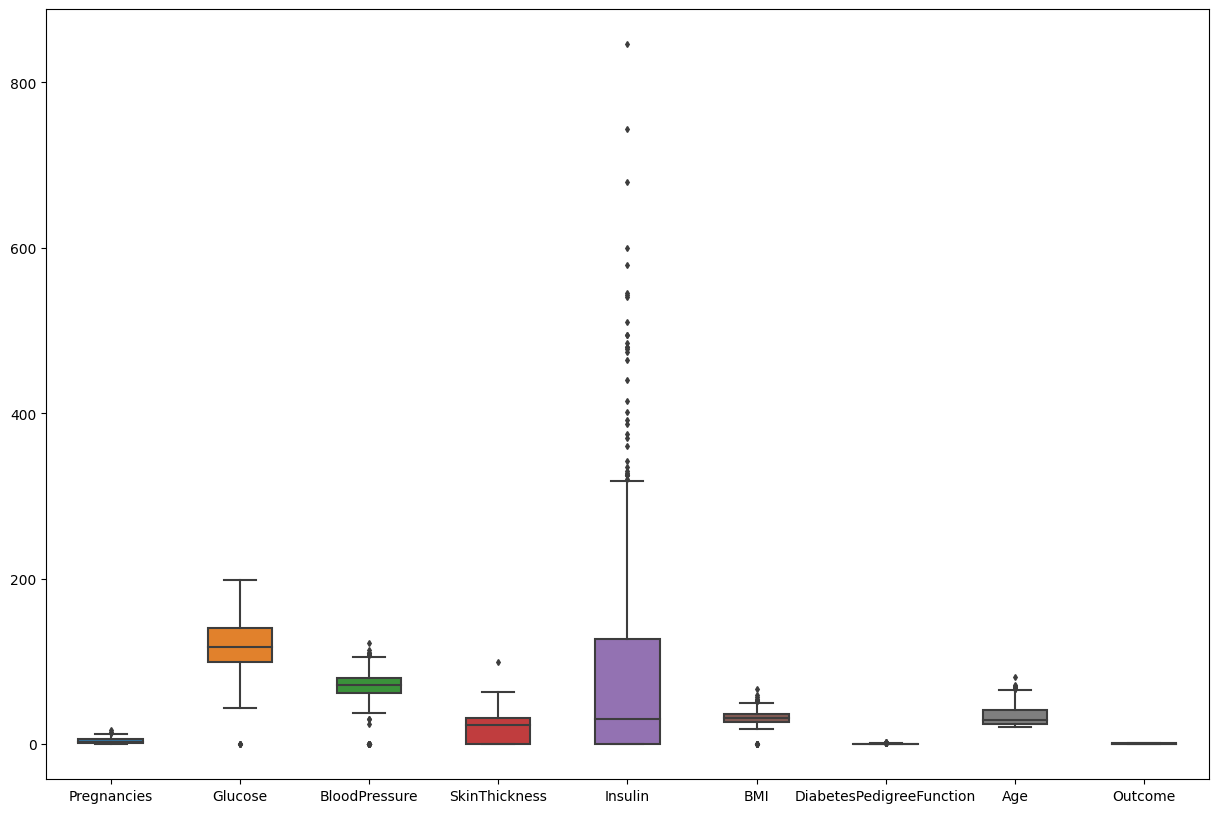

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

<ipython-input-6-bf1bc1245cb3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

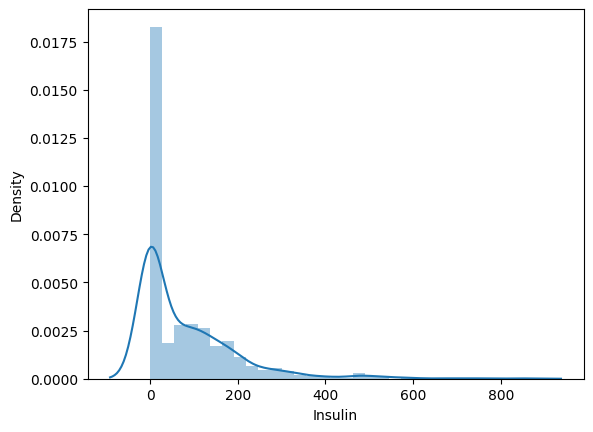

In [ ]:
sns.distplot(df['Insulin'])

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
upper_lim = df['Insulin'].quantile(0.75)+(1.5*(df['Insulin'].quantile(0.75) - df['Insulin'].quantile(0.25)))
lower_lim = df['Insulin'].quantile(0.25)-(1.5*(df['Insulin'].quantile(0.75) - df['Insulin'].quantile(0.25)))

<Axes: >

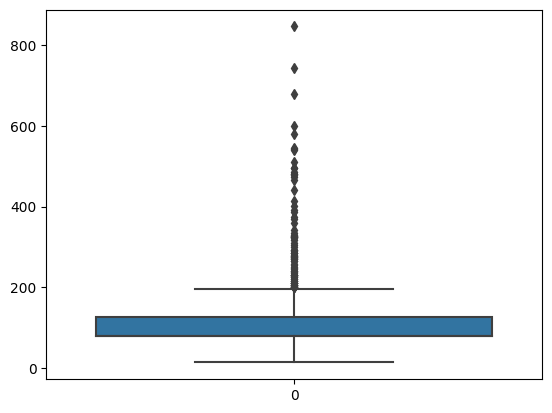

In [ ]:
sns.boxplot(df['Insulin'])

In [ ]:
outliers = (df['Insulin']>upper_lim) | (df['Insulin'] < lower_lim)
df.loc[outliers,'Insulin'] = df['Insulin'].mean()

<Axes: >

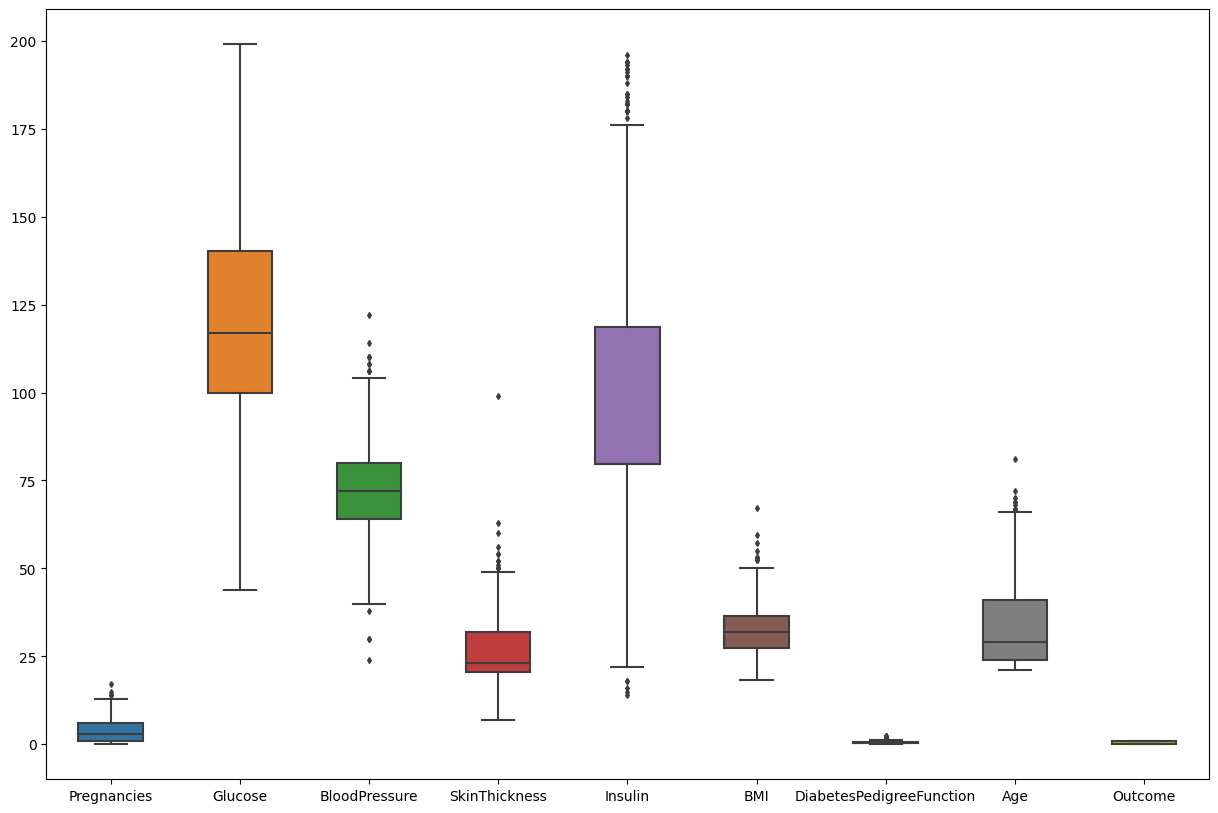

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

<ipython-input-18-bf1bc1245cb3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

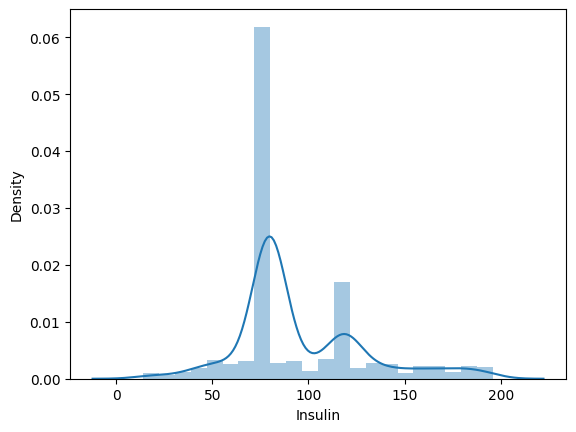

In [ ]:
sns.distplot(df['Insulin'])

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [ ]:
X= df.drop('Outcome',axis=1)
y= df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
y_test.shape,X_test_scaled.shape

((254,), (254, 8))

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled,y_train)

GaussianNB()

In [ ]:
y_pred=classifier.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.7204724409448819

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[132  36]
 [ 35  51]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       168
           1       0.59      0.59      0.59        86

    accuracy                           0.72       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.72      0.72      0.72       254



In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier2 = BernoulliNB()
classifier2.fit(X_train_scaled,y_train)

BernoulliNB()

In [ ]:
y_pred2= classifier2.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test,y_pred2)

0.6850393700787402

In [ ]:
import pickle

In [ ]:
with open('classifier.pkl','wb') as file:
  pickle.dump(classifier,file)